In [389]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from pandas.io.formats.printing import adjoin
import keras 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from keras import optimizers

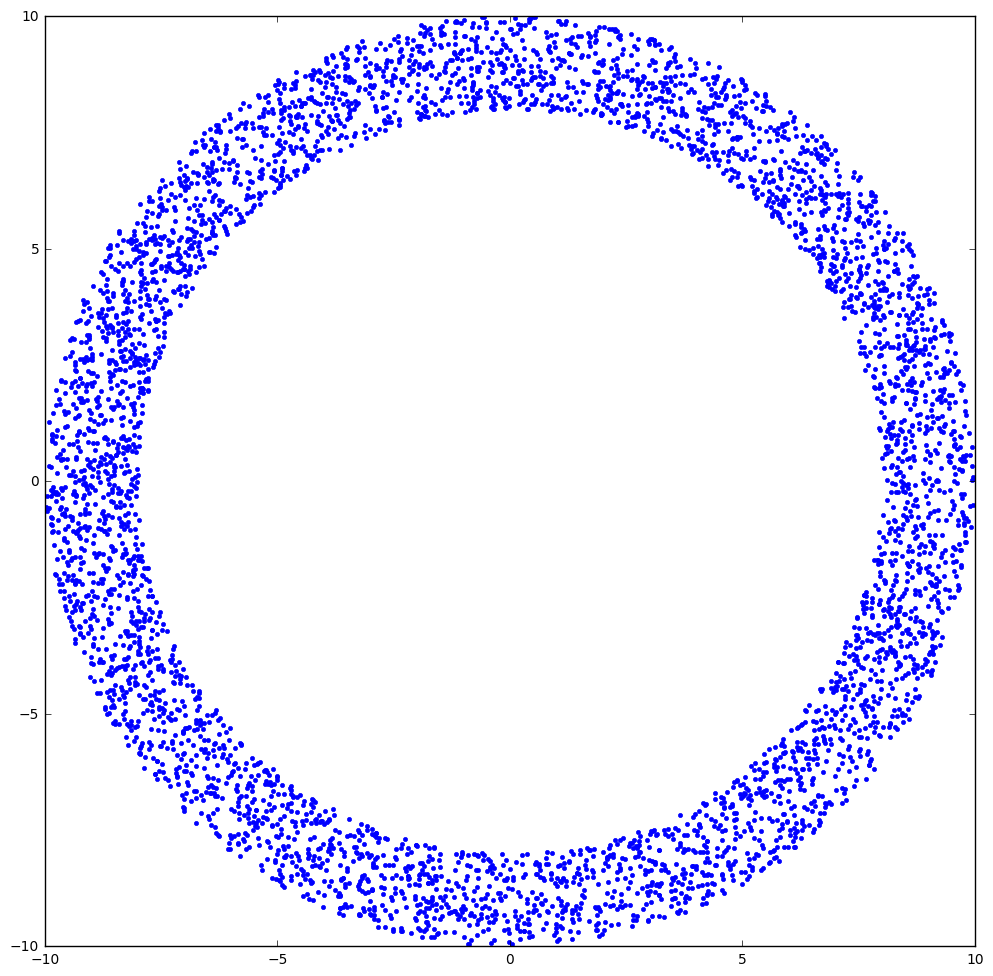

In [390]:
plt.figure(figsize=(12,12))
radiusRing = 8 + 2*np.random.random(5000)
directionRing = 2*np.pi*np.random.random(size = 5000)
#Simulate ring points
ringX = radiusRing*np.cos(directionRing)
ringY = radiusRing*np.sin(directionRing)
plt.plot(ringX, ringY, 'b.');

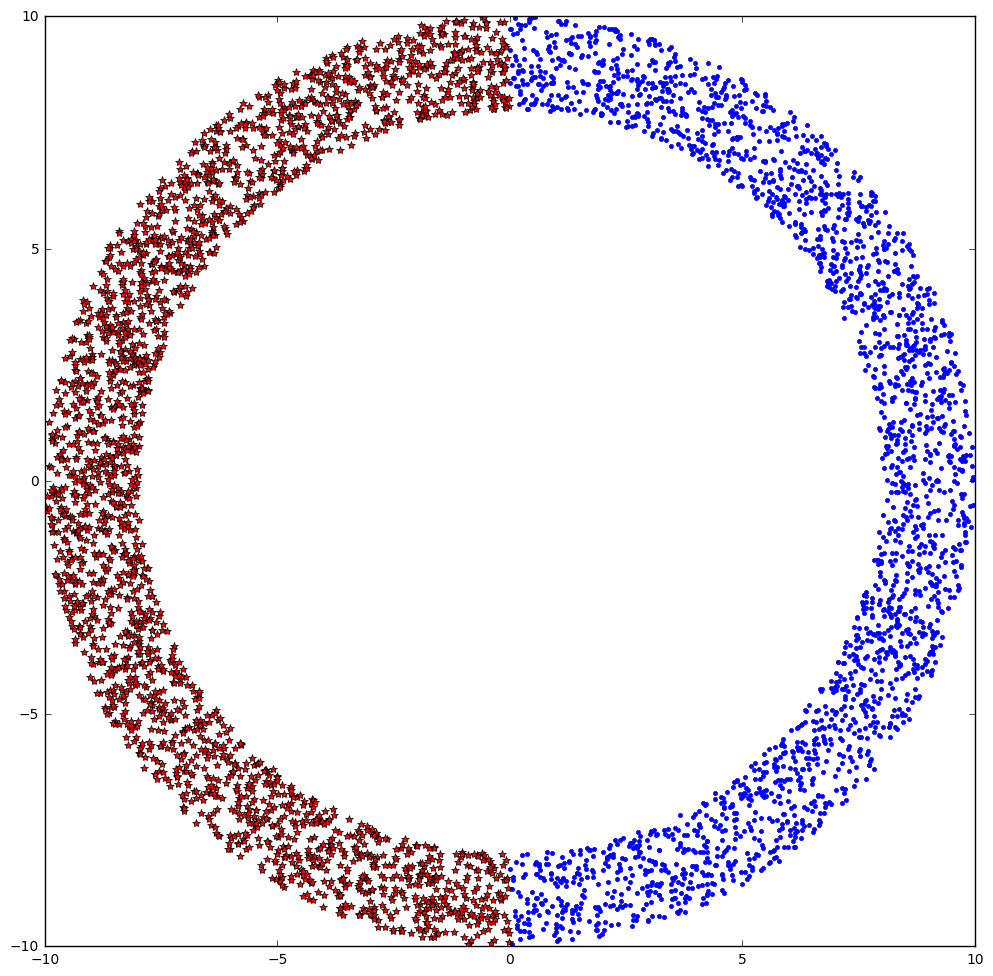

In [392]:
plt.figure(figsize=(12,12))
classAx = ringX[ringX >= 0]
classAy = ringY[ringX >= 0]
classBx = ringX[ringX < 0]
classBy = ringY[ringX < 0]
plt.plot(classAx, classAy, 'b.');
plt.plot(classBx, classBy, 'r*');

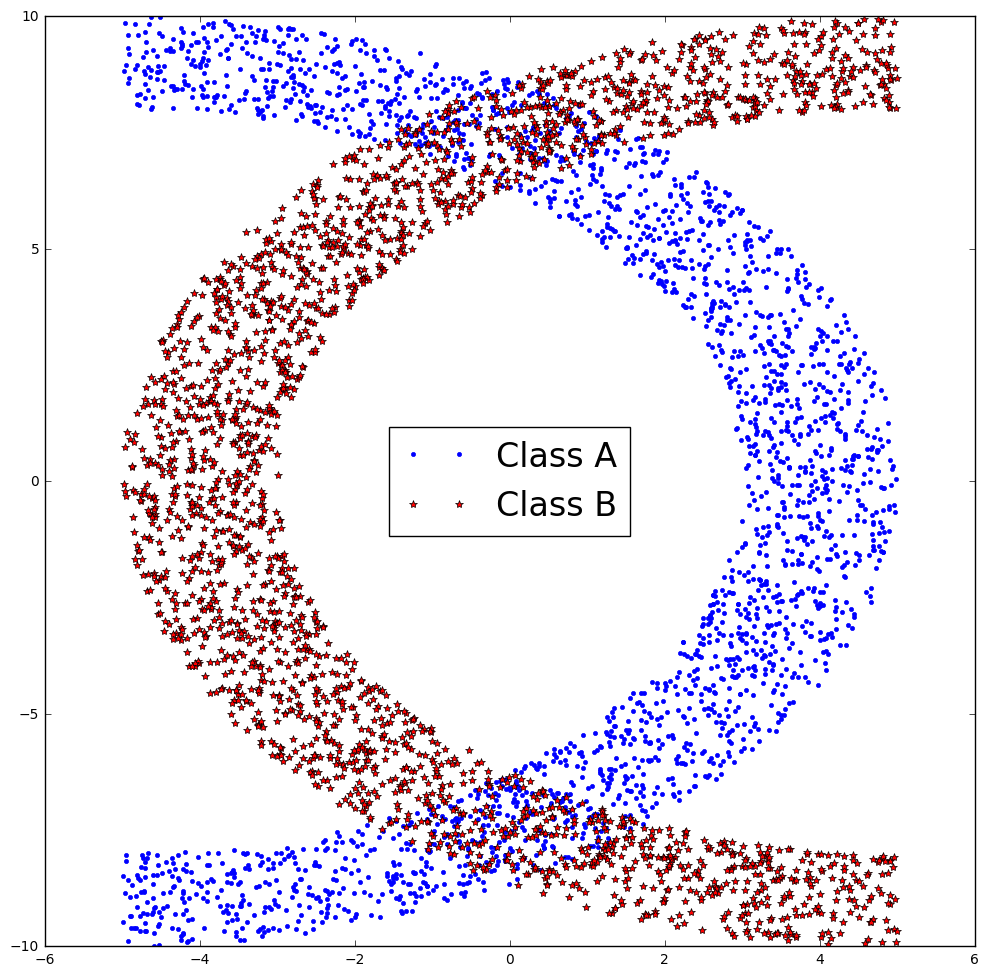

In [308]:
plt.figure(figsize=(12,12))
classAx = ringX[ringX >= 0] - 5
classAy = ringY[ringX >= 0]
classBx = ringX[ringX < 0] + 5
classBy = ringY[ringX < 0]
plt.plot(classAx, classAy, 'b.', classBx, classBy, 'r*');
#plt.plot(classBx, classBy, 'r*');
plt.legend(["Class A", "Class B"], loc='center', prop={'size':24});

In [397]:
classA = [list(t) for t in zip(classAx, classAy)]
aDF =  pd.DataFrame(data = classA, columns=['X', 'Y'])
aDF['Class']='0'
classB = [list(t) for t in zip(classBx, classBy)]
bDF =  pd.DataFrame(data = classB, columns=['X', 'Y'])
bDF['Class']='1'
dataDF = aDF.append(bDF)
dataDF.head()

,X,Y,Class
0,5.779255,-7.494483,0
1,5.676630,-6.071724,0
2,7.069767,4.371219,0
3,1.360148,-8.001385,0
4,5.598537,-7.960846,0


## Randomly Generate Training, Testing and Validation Data Sets

In [396]:
np.random.seed(42)

In [311]:
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))

In [312]:
sampleData = np.asarray(dataDF[['X','Y']])
sampleCategory =  np.asarray(dataDF['Class'])

In [313]:
DATA_SPLIT = 0.7
indices = np.arange(dataDF.shape[0])
np.random.shuffle(indices)
data = sampleData[indices]
labels = sampleCategory[indices]

In [314]:
SplitBounday = int(DATA_SPLIT * data.shape[0])
TrainingData =  data[0:SplitBounday]
TrainingCategory = labels[0:SplitBounday]
ValidationData = data[SplitBounday:SplitBounday+500]
ValidationCategory = labels[SplitBounday:SplitBounday+500]
TestingData =  data[SplitBounday+500:SplitBounday+1500]
TestingCategory = labels[SplitBounday+500:SplitBounday+1500]

In [315]:
side_by_side('Training Data: '+ str(len(TrainingData)), 'Validation Data: '+ str(len(ValidationData)),
             'Testing Data: '+ str(len(TestingData)))
side_by_side('Training Category: '+ str(len(TrainingCategory)), 'Validation Category: '+ str(len(ValidationCategory)),
             'Testing Category: '+ str(len(TestingCategory)))

'Training Data: 3500'    'Validation Data: 500'    'Testing Data: 1000'
'Training Category: 3500'    'Validation Category: 500'    'Testing Category: 1000'


In [316]:
side_by_side('# of Class 0 in Training Sets: %s' %np.count_nonzero(TrainingCategory == '0'),
             '# of Class 1 in Training Sets: %s' %np.count_nonzero(TrainingCategory == '1'))
side_by_side('# of Class 0 in Validation Sets: %s' %np.count_nonzero(ValidationCategory == '0'),
             '# of Class 1 in Validation Sets: %s' %np.count_nonzero(ValidationCategory == '1'))
side_by_side('# of Class 0 in Testing Sets: %s'  %np.count_nonzero(TestingCategory == '0'),
             '# of Class 1 in Testing Sets: %s'  %np.count_nonzero(TestingCategory == '1'))

'# of Class 0 in Training Sets: 1776'    '# of Class 1 in Training Sets: 1724'
'# of Class 0 in Validation Sets: 240'    '# of Class 1 in Validation Sets: 260'
'# of Class 0 in Testing Sets: 473'    '# of Class 1 in Testing Sets: 527'


# Classfication

In [347]:
class model_classfication:
    def __init__(self,traindata,traincategory,validdata,validcategory,testdata,testcategory):
        self.traindata=traindata
        self.traincategory=traincategory
        self.validdata=validdata
        self.validcategory=validcategory
        self.testdata=testdata
        self.testcategory=testcategory
    def keras_binary_classfication(self,hidden_nerual_1,hidden_derual_2,batch_size_number,epochs_number):
        ###one hot encoding
        Train_Category_encoding=to_categorical(self.traincategory)
        Valid_Category_encoding=to_categorical(self.validcategory)
        Test_Category_encoding=to_categorical(self.testcategory)
        ### model
        model = Sequential()
        model.add(Dense(hidden_nerual_1, activation='relu', input_shape=(2,)))
        model.add(Dropout(0.5))
        model.add(Dense(hidden_derual_2, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation='softmax'))
        #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        rmsprop=optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)
        model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
        history = model.fit(self.traindata, Train_Category_encoding,batch_size=batch_size_number, epochs=epochs_number, validation_data=(self.validdata,Valid_Category_encoding),verbose=1)
        eva=model.evaluate(self.testdata,Test_Category_encoding)
        print('\n','Test_accuracy:',eva[1])
    def decisiontree_classfication(self,depth_number):
        tree=DecisionTreeClassifier(criterion='gini',max_depth=depth_number) 
        tree_clf=tree.fit(self.traindata,self.traincategory)
        tree_predict= tree_clf.predict(self.testdata)
        accuracy = metrics.accuracy_score(self.testcategory, tree_predict)
        print('Test_accuracy:',accuracy)
    def SVM_classfication(self):#parameter by default
        clf= svm.SVC()
        svm_clf=clf.fit(self.traindata,self.traincategory)
        svm_predict= svm_clf.predict(self.testdata)
        accuracy = metrics.accuracy_score(self.testcategory, svm_predict)
        print('Test_accuracy:',accuracy)
    def Stochastic_Gradient_Descent(self):#parameter by default
        clf = SGDClassifier()
        sgd_clf=clf.fit(self.traindata,self.traincategory)
        sgd_predict= sgd_clf.predict(self.testdata)
        accuracy = metrics.accuracy_score(self.testcategory, sgd_predict)
        print('Test_accuracy:',accuracy)
    def k_Nearest_Neighbors(self,neighbors_number):
        clf= KNeighborsClassifier(n_neighbors=neighbors_number)
        knn_clf=clf.fit(self.traindata,self.traincategory)
        knn_predict=knn_clf.predict(self.testdata)
        accuracy = metrics.accuracy_score(self.testcategory, knn_predict)
        print('Test_accuracy:',accuracy)
    def RandomForest_classfication(self,tree_number):
        clf = RandomForestClassifier(n_estimators=tree_number)
        forest_clf=clf.fit(self.traindata,self.traincategory)
        forest_predict= forest_clf.predict(self.testdata)
        accuracy = metrics.accuracy_score(self.testcategory, forest_predict)
        print('Test_accuracy:',accuracy)
        
    

In [381]:
model_type=model_classfication(TrainingData,TrainingCategory,ValidationData,ValidationCategory,TestingData,TestingCategory)
#model_type.keras_binary_classfication(50,50,64,200)#hidden_nerual_1,hidden_derual_2,batch_size_number,epochs_number 93.1
#model_type.decisiontree_classfication(15)#depth_size 91
#model_type.SVM_classfication()#parameter by default 92
#model_type.Stochastic_Gradient_Descent()#parameter by default 60
#model_type.k_Nearest_Neighbors(1)#neighbors_number 92.7
#model_type.RandomForest_classfication(10)#tree_number 92

Test_accuracy: 0.911


# Q: Try your best to solve the above two-class problem. (Due on 12/8/2017 Draft, 12/15/2017 Finished)
## 1. Whatever computational model(s) or algorithm(s) you selected; please describe the rationale behind your choice.
## 2. As in all experimental work, it is possible that your results may or may not come out as accurate as you expected, whatever the result(s) may be, please list out the potential factors.(e.g. what factors limit your accuracy, and how these factors limit your accuracy, which factors dominate? are they all significant?)
## 3. Please, have your report and code written in Jupyter Notebook. Your report should include:
> ### 1. Title
> ### Abstract: This should be a brief (100 words) statement of the experiment (what is it?) and your conclusions (what did you do with it?). Be sure to include your results, along with their associated errors.
> ### 2. Theory: Include the working equations (models) that you will be using but do not include lengthy derivations unless specifically needed. Instead concentrate on explaining what the equations (model) mean, do include a few sentences on where the equations come from and what they are dependent on, and also cite a reference where the derivations may be found.
> ### 3. Data Analytic - Use Python. This section really is the heart of your report, so you would be wise to start it early. Do not simply present results without commenting on them. Overall, it should be clear to the reader why it is that you are doing what you are doing, and what it is that you find. Meaning that it is important that your reader is easily able to follow what it is that you are doing, and why you are doing it that way.
> ### 4. Conclusion
> ### 5. Reference

## 4. You are encouraged to run as many trials as you want. (The more trials you conduct, the greater your chances of getting a higher grade.)